In [1]:
pip install torch transformers


In [11]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch

# 1. Modell und Tokenizer laden
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# 2. Eingabe-Text definieren (dein String)
input_text = "Why is a cat hungry in the morning?"
input_text2 = "Why is a dog hungry in the morning?"
# 3. Text in Token umwandeln (und damit numerische IDs)
input_ids = tokenizer.encode(input_text, return_tensors='pt')
input_ids2 = tokenizer.encode(input_text2, return_tensors='pt')
print("tokens: ", input_ids)
print("tokens - 2", input_ids2)
input_animals = "cat tiger dog leopard lion snake elephant fox"
input_ids3 = tokenizer.encode(input_animals, return_tensors='pt')

print("animals Id's", input_ids3)

# 4. Ausgabe des Modells generieren
with torch.no_grad():
    output = model.generate(input_ids, max_length=50, num_return_sequences=1)

# 5. Ausgabe (numerische IDs) zurück in Text umwandeln
output_text = tokenizer.decode(output[0], skip_special_tokens=True)

# 6. Ergebnis anzeigen
print("Input Text:", input_text)
print("Generated Text:", output_text)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


tokens:  tensor([[ 5195,   318,   257,  3797, 14720,   287,   262,  3329,    30]])
tokens - 2 tensor([[ 5195,   318,   257,  3290, 14720,   287,   262,  3329,    30]])
animals tensor([[ 9246, 26241,  3290,   308,   538,   446, 18744, 17522,  9766,    69,
           415, 21831]])
Input Text: Why is a cat hungry in the morning?
Generated Text: Why is a cat hungry in the morning?

A cat is hungry in the morning.

A cat is hungry in the morning.

A cat is hungry in the morning.

A cat is hungry in the morning.



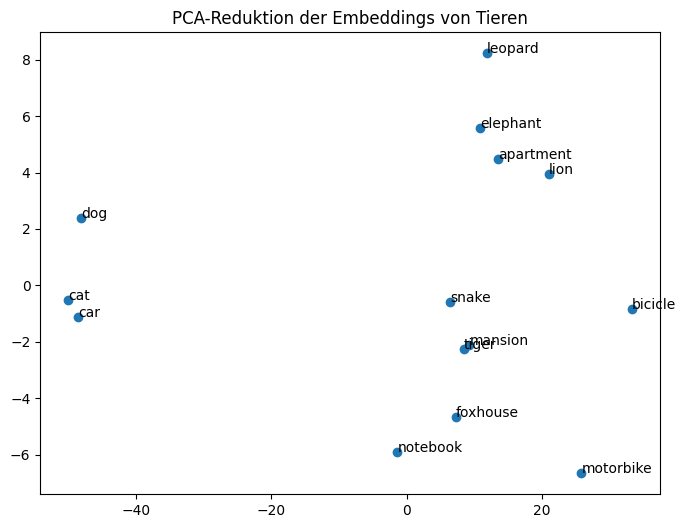

In [16]:
from transformers import GPT2Tokenizer, GPT2Model
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Lade GPT-2 Tokenizer und Modell
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')

# Liste von Tieren für das Beispiel
animals = ["cat", "tiger", "dog", "lion", "leopard", "car", "snake", "elephant", "fox" "house", "apartment", "bicicle", "motorbike", "mansion", "notebook"]

# Tokenisieren und Embeddings extrahieren
embeddings = []
for animal in animals:
    input_ids = tokenizer.encode(animal, return_tensors='pt')
    with torch.no_grad():
        output = model(input_ids)
    embedding = output.last_hidden_state.mean(dim=1).squeeze()  # Durchschnitt der Embedding-Dimensionen
    embeddings.append(embedding.numpy())

# PCA zur Reduktion der Dimensionen auf 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualisieren
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

# Tiere beschriften
for i, animal in enumerate(animals):
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], animal)

plt.title("PCA-Reduktion der Embeddings von Tieren")
plt.show()


**Hier den Vektorraum der einzelne Wörter darstellen**

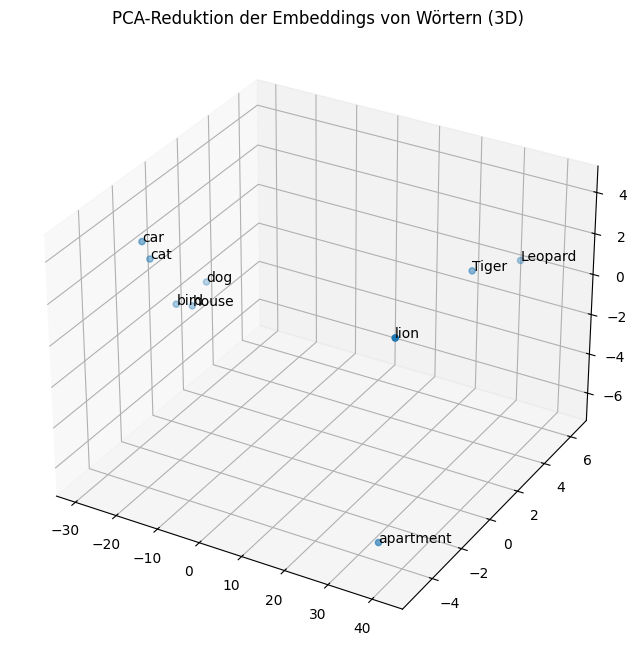

In [19]:
#3d Reduzieren
from transformers import GPT2Tokenizer, GPT2Model
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Für 3D-Plot

# Lade GPT-2 Tokenizer und Modell
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')

# Liste der Wörter, deren Embeddings wir anzeigen möchten
words = ["cat", "dog", "lion", "Leopard", "Tiger", "bird", "car", "house", "apartment"]

# Tokenisieren und Embeddings extrahieren
embeddings = []
for word in words:
    input_ids = tokenizer.encode(word, return_tensors='pt')  # Wort in Token umwandeln
    with torch.no_grad():
        output = model(input_ids)  # Vorwärtsdurchlauf
    embedding = output.last_hidden_state.mean(dim=1).squeeze()  # Durchschnitt der Embedding-Dimensionen
    embeddings.append(embedding.numpy())

# PCA zur Reduktion der Dimensionen auf 3D
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualisierung in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Streudiagramm für 3D erstellen
ax.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], reduced_embeddings[:, 2])

# Wörter beschriften
for i, word in enumerate(words):
    ax.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], reduced_embeddings[i, 2], word)

ax.set_title("PCA-Reduktion der Embeddings von Wörtern (3D)")
plt.show()


In [29]:
%reset -f

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


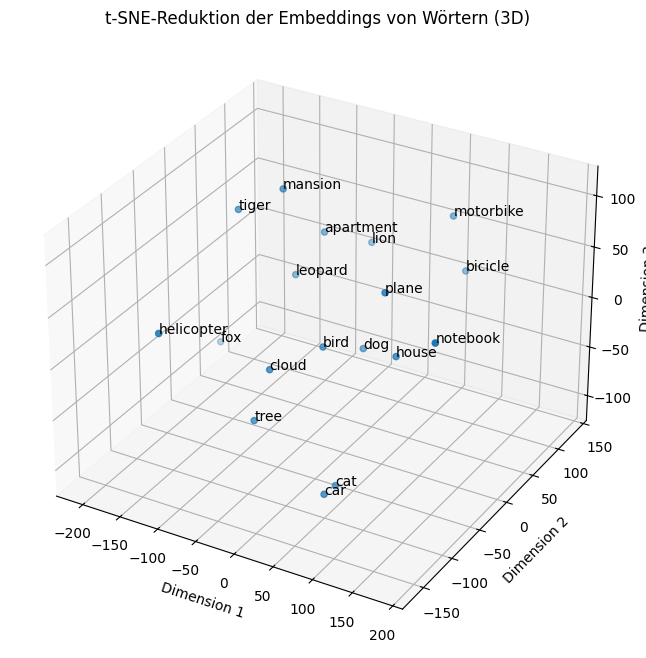

In [5]:
import torch
from transformers import GPT2Tokenizer, GPT2Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D  # Für 3D-Plot

# Lade GPT-2 Tokenizer und Modell
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')

# Liste der englischen Wörter, deren Embeddings wir anzeigen möchten
words = ["cat", "dog", "lion", "leopard", "tiger", "bird", "car", "house", "apartment", "mansion", "notebook", "tree", "plane", "helicopter","bicicle", "motorbike", "fox", "cloud"]

# Tokenisieren und Embeddings extrahieren
embeddings = []
for word in words:
    input_ids = tokenizer.encode(word, return_tensors='pt')  # Wort in Token umwandeln
    with torch.no_grad():
        output = model(input_ids)  # Vorwärtsdurchlauf
    embedding = output.last_hidden_state.mean(dim=1).squeeze()  # Durchschnitt der Embedding-Dimensionen
    embeddings.append(embedding.numpy())

# Konvertiere die Liste von Embeddings in ein NumPy-Array
embeddings_array = np.array(embeddings)

# t-SNE zur Reduktion der Dimensionen auf 3D
tsne = TSNE(n_components=3, random_state=0, perplexity=2, n_iter=1000)

# Reduziere die Embeddings auf 3 Dimensionen
reduced_embeddings_tsne = tsne.fit_transform(embeddings_array)

# Visualisierung in 3D mit t-SNE
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Streudiagramm für 3D erstellen
ax.scatter(reduced_embeddings_tsne[:, 0], reduced_embeddings_tsne[:, 1], reduced_embeddings_tsne[:, 2])

# Wörter beschriften
for i, word in enumerate(words):
    ax.text(reduced_embeddings_tsne[i, 0], reduced_embeddings_tsne[i, 1], reduced_embeddings_tsne[i, 2], word)

# Titel und Achsenlabels setzen
ax.set_title("t-SNE-Reduktion der Embeddings von Wörtern (3D)")
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# Zeige das Plot an
plt.show()


In [3]:
%reset -f